In [91]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings("ignore")

## macroeconomic predictors

In [2]:
data = pd.read_csv('C:\\Judy\\MFE Courses\\431_Quantitative_Asset_Management\\Final_Project\\Macro_Result.csv')

In [3]:
data

,Unnamed: 0,yyyymm,dp,ep,tms,dfy,b/m,ntis,tbl,svar
0,0,187101,-2.837728,-2.406945,NaN,NaN,NaN,NaN,NaN,NaN
1,1,187102,-2.851151,-2.420368,NaN,NaN,NaN,NaN,NaN,NaN
2,2,187103,-2.875302,-2.444519,NaN,NaN,NaN,NaN,NaN,NaN
3,3,187104,-2.903111,-2.472328,NaN,NaN,NaN,NaN,NaN,NaN
4,4,187105,-2.928112,-2.497329,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1795,1795,202008,-4.080892,-3.569975,0.0055,0.0102,0.235975,-0.008504,0.0010,0.000743
1796,1796,202009,-4.045576,-3.533379,0.0057,0.0105,0.241482,-0.005698,0.0011,0.004907
1797,1797,202010,-4.020767,-3.519301,0.0069,0.0109,0.253146,-0.001895,0.0010,0.003661
1798,1798,202011,-4.126172,-3.635623,0.0078,0.0100,0.226352,-0.005262,0.0009,0.002492


In [4]:
del data['Unnamed: 0']

In [5]:
data['const'] = 1

In [6]:
data['date'] = data['yyyymm'].apply(lambda x: str(x))

In [7]:
data['Year'] = data['date'].apply(lambda x: int(x[0:4]))
data['Month'] = data['date'].apply(lambda x: int(x[4:6]))

## Top20 stock characteristic

In [8]:
data2 = pd.read_csv('C:\\Judy\\MFE Courses\\431_Quantitative_Asset_Management\\Final_Project\\neural_net20.csv')

In [9]:
data2

,Unnamed: 0,permno,DATE,monthly_ret,mom1m,maxret,chmom,mom6m,mom12m,indmom,...,baspread,ill,std_turn,zerotrade,retvol,idiovol,beta,nincr,sp,securedind
0,0,12490,1971-01-29,0.024390,0.034174,0.019481,0.590998,0.239887,-0.142915,-0.299786,...,0.011906,5.840190e-10,0.110307,2.851970e-07,0.008485,0.020154,0.803744,NaN,0.173637,0.0
1,1,46711,1971-01-29,0.400000,-0.069767,0.025641,0.100862,-0.113402,-0.358209,-0.071420,...,0.033081,2.249769e-06,2.057111,4.536949e-08,0.026531,0.056848,0.836741,NaN,4.156407,0.0
2,2,12490,1971-02-26,0.037788,0.024390,0.025197,0.533709,0.264805,-0.036290,-0.201744,...,0.012634,8.324503e-10,0.081812,3.585047e-07,0.010993,0.020440,0.794590,NaN,0.173637,0.0
3,3,46711,1971-02-26,0.285714,0.400000,0.096154,0.833386,-0.024390,-0.480519,0.082094,...,0.035391,6.040850e-06,1.896845,7.023350e-08,0.037649,0.056339,0.839637,NaN,4.156407,0.0
4,4,12490,1971-03-31,0.062407,0.037788,0.022088,0.484282,0.227525,-0.030710,-0.157373,...,0.013848,8.804261e-10,0.054026,4.701955e-07,0.010564,0.020724,0.753383,NaN,0.173637,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,7277,90319,2016-12-30,0.021356,-0.042005,0.029128,0.054448,0.081525,0.061677,0.016401,...,0.021003,6.558095e-12,3.774304,1.275680e-08,0.015422,0.031339,0.899436,0.0,0.140228,0.0
7278,7278,91893,2016-12-30,-0.135343,-0.215569,0.060870,-0.164510,0.128378,0.184397,0.016401,...,0.102578,5.990145e-07,2.241420,3.913088e-08,0.041781,0.096353,0.831672,0.0,0.180012,0.0
7279,7279,92257,2016-12-30,-0.029702,0.032316,0.032050,0.353670,0.297886,0.279922,0.016401,...,0.017066,7.234430e-11,4.852816,7.062011e-09,0.011528,0.036946,0.685033,0.0,0.278472,0.0
7280,7280,93132,2016-12-30,0.000664,-0.061135,0.018459,-0.069890,-0.062847,-0.109939,0.053773,...,0.027387,1.876530e-10,8.767311,7.272621e-09,0.013527,0.037352,1.299777,1.0,0.188913,0.0


In [10]:
del data2['Unnamed: 0']

In [11]:
data2['DATE'] = pd.to_datetime(data2['DATE']).copy()
data2['Year'] = data2['DATE'].dt.year
data2['Month'] = data2['DATE'].dt.month

## The Kronecker product

In [12]:
all_data = data2.merge(data,on = ['Year','Month'])

In [13]:
all_data

,permno,DATE,monthly_ret,mom1m,maxret,chmom,mom6m,mom12m,indmom,mom36m,...,dp,ep,tms,dfy,b/m,ntis,tbl,svar,const,date
0,12490,1971-01-29,0.024390,0.034174,0.019481,0.590998,0.239887,-0.142915,-0.299786,0.185018,...,-3.422064,-2.922161,0.0168,0.0138,0.624410,0.030593,0.0444,0.000541,1,197101
1,46711,1971-01-29,0.400000,-0.069767,0.025641,0.100862,-0.113402,-0.358209,-0.071420,NaN,...,-3.422064,-2.922161,0.0168,0.0138,0.624410,0.030593,0.0444,0.000541,1,197101
2,12490,1971-02-26,0.037788,0.024390,0.025197,0.533709,0.264805,-0.036290,-0.201744,0.149508,...,-3.434297,-2.925397,0.0259,0.0131,0.617070,0.025801,0.0370,0.000451,1,197102
3,46711,1971-02-26,0.285714,0.400000,0.096154,0.833386,-0.024390,-0.480519,0.082094,NaN,...,-3.434297,-2.925397,0.0259,0.0131,0.617070,0.025801,0.0370,0.000451,1,197102
4,12490,1971-03-31,0.062407,0.037788,0.022088,0.484282,0.227525,-0.030710,-0.157373,0.197352,...,-3.473643,-2.955768,0.0255,0.0125,0.633811,0.026399,0.0338,0.000493,1,197103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,90319,2016-12-30,0.021356,-0.042005,0.029128,0.054448,0.081525,0.061677,0.016401,0.437665,...,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1,201612
7278,91893,2016-12-30,-0.135343,-0.215569,0.060870,-0.164510,0.128378,0.184397,0.016401,-0.913202,...,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1,201612
7279,92257,2016-12-30,-0.029702,0.032316,0.032050,0.353670,0.297886,0.279922,0.016401,-0.238373,...,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1,201612
7280,93132,2016-12-30,0.000664,-0.061135,0.018459,-0.069890,-0.062847,-0.109939,0.053773,1.106433,...,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1,201612


In [14]:
def kronecker(x):
    #print(x)
    Cit = x[3:23]
    Xit = x[26:35]
    return np.kron(Cit,Xit)

In [15]:
kronercker_outcome = pd.DataFrame(all_data.apply(kronecker, axis=1).to_list())

In [16]:
kronercker_outcome.insert (0, "permno", all_data['permno'])
kronercker_outcome.insert (1, "DATE", all_data['DATE'])
kronercker_outcome.insert (2, "monthly_ret", all_data['monthly_ret'])

In [220]:
kronercker_outcome

,permno,DATE,monthly_ret,0,1,2,3,4,5,6,...,172,173,174,175,176,177,178,179,Year,Month
0,12490,1971-01-29,0.024390,-0.116946,-0.099862,0.000574,0.000472,0.021339,0.001045,0.001517,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,1
1,46711,1971-01-29,0.400000,0.238749,0.203872,-0.001172,-0.000963,-0.043563,-0.002134,-0.003098,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,1
2,12490,1971-02-26,0.037788,-0.083763,-0.071351,0.000632,0.000320,0.015050,0.000629,0.000902,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,2
3,46711,1971-02-26,0.285714,-1.373719,-1.170159,0.010360,0.005240,0.246828,0.010321,0.014800,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,2
4,12490,1971-03-31,0.062407,-0.131262,-0.111693,0.000964,0.000472,0.023950,0.000998,0.001277,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,90319,2016-12-30,0.021356,0.163467,0.132929,-0.000928,-0.000323,-0.012328,0.001051,-0.000214,...,-0.00000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0,2016,12
7278,91893,2016-12-30,-0.135343,0.838907,0.682185,-0.004764,-0.001660,-0.063265,0.005395,-0.001099,...,-0.00000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0,2016,12
7279,92257,2016-12-30,-0.029702,-0.125759,-0.102265,0.000714,0.000249,0.009484,-0.000809,0.000165,...,-0.00000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0,2016,12
7280,93132,2016-12-30,0.000664,0.237914,0.193468,-0.001351,-0.000471,-0.017942,0.001530,-0.000312,...,-0.00000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0,2016,12


In [41]:
kronercker_outcome.sort_values(by = ['DATE'])

,permno,DATE,monthly_ret,0,1,2,3,4,5,6,...,172,173,174,175,176,177,178,179,Year,Month
0,12490,1971-01-29,0.024390,-0.116946,-0.099862,0.000574,0.000472,0.021339,0.001045,0.001517,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,1
1,46711,1971-01-29,0.400000,0.238749,0.203872,-0.001172,-0.000963,-0.043563,-0.002134,-0.003098,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,1
2,12490,1971-02-26,0.037788,-0.083763,-0.071351,0.000632,0.000320,0.015050,0.000629,0.000902,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,2
3,46711,1971-02-26,0.285714,-1.373719,-1.170159,0.010360,0.005240,0.246828,0.010321,0.014800,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,2
4,12490,1971-03-31,0.062407,-0.131262,-0.111693,0.000964,0.000472,0.023950,0.000998,0.001277,...,-0.00000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0,1971,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,10107,2016-12-30,0.031198,-0.047411,-0.038554,0.000269,0.000094,0.003575,-0.000305,0.000062,...,-0.00000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0,2016,12
7258,10104,2016-12-30,-0.043294,-0.179285,-0.145791,0.001018,0.000355,0.013521,-0.001153,0.000235,...,-0.00000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0,2016,12
7280,93132,2016-12-30,0.000664,0.237914,0.193468,-0.001351,-0.000471,-0.017942,0.001530,-0.000312,...,-0.00000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0,2016,12
7268,60206,2016-12-30,0.024342,-0.348754,-0.283600,0.001981,0.000690,0.026301,-0.002243,0.000457,...,-3.16458,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1.0,2016,12


## Different Functions

In [221]:
kronercker_outcome = kronercker_outcome.fillna(0)

In [222]:
#data2['DATE'] = pd.to_datetime(data2['DATE']).copy()
kronercker_outcome['Year'] = kronercker_outcome['DATE'].dt.year
kronercker_outcome['Month'] = kronercker_outcome['DATE'].dt.month

In [223]:
X = kronercker_outcome.iloc[:,3:183]
y = kronercker_outcome['monthly_ret']

In [224]:
train_df = kronercker_outcome[kronercker_outcome['Year']<1994]
test_df = kronercker_outcome[kronercker_outcome['Year'] >= 1994]

In [225]:
X_train = train_df.iloc[:,3:183]
y_train = train_df['monthly_ret']
X_test = test_df.iloc[:,3:183]
y_test = test_df['monthly_ret']

In [226]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-0.116946,-0.099862,0.000574,0.000472,0.021339,0.001045,0.001517,0.000018,0.034174,-0.066664,...,0.173637,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.0
1,0.238749,0.203872,-0.001172,-0.000963,-0.043563,-0.002134,-0.003098,-0.000038,-0.069767,-0.087745,...,4.156407,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.0
2,-0.083763,-0.071351,0.000632,0.000320,0.015050,0.000629,0.000902,0.000011,0.024390,-0.086533,...,0.173637,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.0
3,-1.373719,-1.170159,0.010360,0.005240,0.246828,0.010321,0.014800,0.000181,0.400000,-0.330221,...,4.156407,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.0
4,-0.131262,-0.111693,0.000964,0.000472,0.023950,0.000998,0.001277,0.000019,0.037788,-0.076725,...,0.173637,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,0.401476,0.339902,-0.003867,-0.000844,-0.033919,-0.005081,-0.003400,-0.000030,-0.111111,-0.963542,...,9.098623,-3.613281,-3.059121,0.0348,0.0076,0.305267,0.045727,0.0306,0.00027,1.0
2415,-0.352515,-0.298451,0.003395,0.000741,0.029782,0.004461,0.002985,0.000026,0.097561,-0.272358,...,0.105854,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.0
2416,-0.068175,-0.057719,0.000657,0.000143,0.005760,0.000863,0.000577,0.000005,0.018868,-0.236936,...,0.237056,-3.613281,-3.059121,0.0348,0.0076,0.305267,0.045727,0.0306,0.00027,1.0
2417,1.121770,0.949727,-0.010804,-0.002359,-0.094773,-0.014196,-0.009500,-0.000084,-0.310458,-0.155410,...,0.283074,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.00000,0.0


In [227]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
2419,0.331075,0.279881,-0.003082,-0.000664,-0.026187,-0.003970,-0.002709,-0.000038,-0.090909,-0.153487,...,0.253076,-3.641825,-3.078695,0.0339,0.0073,0.288059,0.043671,0.0298,0.000423,1.0
2420,-0.028452,-0.024052,0.000265,0.000057,0.002250,0.000341,0.000233,0.000003,0.007812,-0.126338,...,0.151233,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0
2421,-0.049214,-0.041604,0.000458,0.000099,0.003893,0.000590,0.000403,0.000006,0.013514,-0.295283,...,0.524554,-3.641825,-3.078695,0.0339,0.0073,0.288059,0.043671,0.0298,0.000423,1.0
2422,-0.177444,-0.150006,0.001652,0.000356,0.014035,0.002128,0.001452,0.000021,0.048724,-0.142506,...,2.241465,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0
2423,0.260130,0.219907,-0.002421,-0.000521,-0.020576,-0.003119,-0.002129,-0.000030,-0.071429,-0.167056,...,1.325488,-0.000000,-0.000000,0.0000,0.0000,0.000000,0.000000,0.0000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,0.163467,0.132929,-0.000928,-0.000323,-0.012328,0.001051,-0.000214,-0.000022,-0.042005,-0.113356,...,0.140228,-0.000000,-0.000000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0
7278,0.838907,0.682185,-0.004764,-0.001660,-0.063265,0.005395,-0.001099,-0.000113,-0.215569,-0.236880,...,0.180012,-0.000000,-0.000000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0
7279,-0.125759,-0.102265,0.000714,0.000249,0.009484,-0.000809,0.000165,0.000017,0.032316,-0.124724,...,0.278472,-0.000000,-0.000000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0
7280,0.237914,0.193468,-0.001351,-0.000471,-0.017942,0.001530,-0.000312,-0.000032,-0.061135,-0.071833,...,0.188913,-0.000000,-0.000000,0.0000,0.0000,0.000000,-0.000000,0.0000,0.000000,0.0


### OLS

In [228]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [229]:
lm = LinearRegression()
y_pred = cross_val_predict(lm, X_train, y_train, cv=5)
final_model = lm.fit(X_train,y_train)
new_predictions = final_model.predict(X_test)

In [230]:
MSE_OLS = mean_squared_error(new_predictions,y_test)
MSE_OLS

0.4143037819161207

In [231]:
R2_OLS = r2_score(new_predictions,y_test)
R2_OLS

-0.7417154954386436

### OLS 3

### PLS

In [232]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error

Text(0.5, 1.0, 'hp')

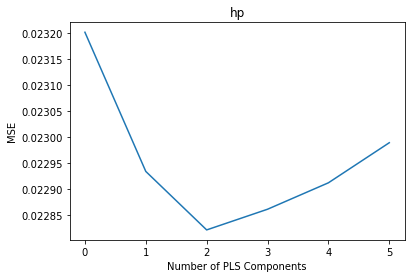

In [233]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [234]:
# Choose components = 2
pls = PLSRegression(n_components=2)
y_pred = cross_val_predict(pls, X_train, y_train, cv=5)
final_model = pls.fit(X_train,y_train)
new_predictions = final_model.predict(X_test)

In [235]:
MSE_PLS = mean_squared_error(new_predictions,y_test)
MSE_PLS

0.024877781484613476

In [236]:
R2_PLS = r2_score(new_predictions,y_test)
R2_PLS

-7.045748284440112

## PCR

Text(0.5, 1.0, 'hp')

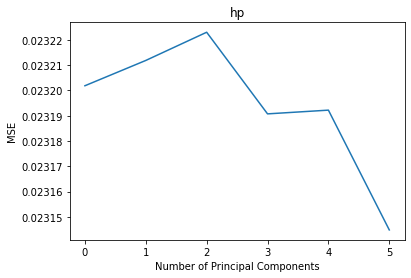

In [237]:
from sklearn.decomposition import PCA
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [238]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:2]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:2], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)

In [239]:
MSE_PCR = mean_squared_error(pred,y_test)
MSE_PCR

0.023152444285880435

In [240]:
R2_PCR = r2_score(pred,y_test)
R2_PCR

-697.2720908831113

## Elastic Net

In [241]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [242]:
lambdas = 2**np.linspace(-1,5,25)*0.02
elastic_net = ElasticNet(l1_ratio = 0.5)
coefs = pd.DataFrame(index = lambdas, columns = X_train.columns)
for j, l in enumerate(lambdas):
        elastic_net.alpha = l   # set the severity of the constraint
        elastic_net.fit(X_train, y_train)
        coefs.iloc[j] = elastic_net.coef_
coefs

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0.010000,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0.000387757,0,-0,-0,-0,0,-0,-0,-0
0.011892,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.014142,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.016818,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.020000,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.023784,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.028284,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.033636,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.040000,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0
0.047568,-0,-0,0,0,0,0,0,-0,0,-0,...,-0,0,0,-0,-0,-0,0,-0,-0,-0


In [243]:
alpha = 10**np.linspace(-1,10,100)*0.02
elastic_net = ElasticNetCV(l1_ratio=0.5,alphas=alpha,cv=5)
elastic_net.fit(X_train, y_train)
elastic_net.alpha_
elastic_net.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [244]:
pred = elastic_net.predict(X_test)
MSE_EN = mean_squared_error(pred,y_test)
MSE_EN

0.3911719130995223

In [245]:
R2_EN = r2_score(pred,y_test)
R2_EN

-0.5181870702848081

## Random Forest
### Not cross_validation yet

In [246]:
from sklearn.ensemble import RandomForestRegressor

In [247]:
rf = RandomForestRegressor(n_estimators = 250, max_depth = 10, random_state = 42, max_features = 9)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=9, n_estimators=250,
                      random_state=42)

In [248]:
pred = rf.predict(X_test)
MSE_RF = mean_squared_error(pred,y_test)
MSE_RF

0.02439238981619071

In [249]:
R2_RF = r2_score(pred,y_test)
R2_RF

-10.876702699644438

## XGBoost

In [250]:
import xgboost as xgb

In [251]:
xgb_regressor = xgb.XGBRegressor(booster = "gbtree", objective = "reg:squarederror", n_estimators = 999,reg_lambda = 10, gamma = 0, max_depth = 6,learning_rate = 0.3)
xgb_parm = xgb_regressor.get_xgb_params()

In [252]:
xgb_train = xgb.DMatrix(X_train,y_train)

In [253]:
xgb_cvresult = xgb.cv(xgb_parm,xgb_train,num_boost_round = 999, metrics = 'rmse',nfold = 10,stratified = False, seed = i+1234,early_stopping_rounds = 20)

In [254]:
xgb_regressor.set_params(n_estimators = xgb_cvresult.shape[0])
xgb_regressor.fit(X_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=21, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [255]:
xgb_prediction = xgb_regressor.predict(X_test,ntree_limit = xgb_cvresult.shape[0])
xgb_prediction

array([0.09933415, 0.04820048, 0.13400838, ..., 0.03728905, 0.04132724,
       0.05141244], dtype=float32)

In [256]:
MSE_xgb = mean_squared_error(xgb_prediction,y_test)
MSE_xgb

0.010922069434742412

In [257]:
R2_xgb = r2_score(xgb_prediction,y_test)
R2_xgb

-0.9976306295530903

## Outcome(MSE)

In [258]:
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns

<AxesSubplot:xlabel='method', ylabel='mse'>

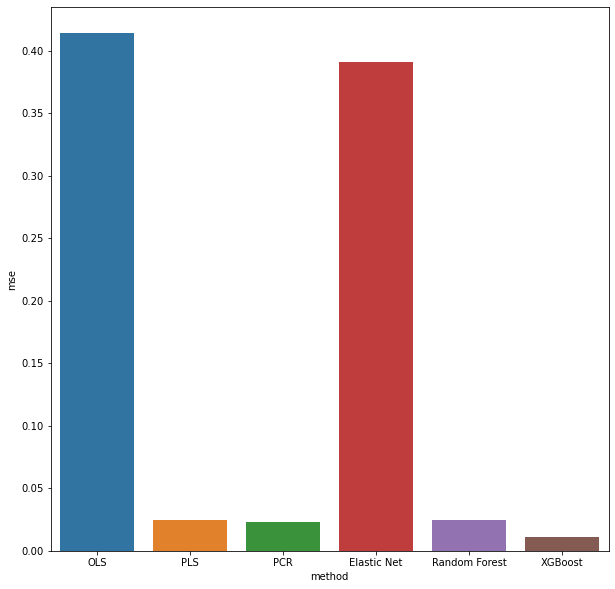

In [260]:
outcome = pd.DataFrame(['OLS','PLS','PCR','Elastic Net','Random Forest','XGBoost'],columns = ["method"])
outcome['mse'] = [MSE_OLS,MSE_PLS,MSE_PCR,MSE_EN,MSE_RF,MSE_xgb]
plt.figure(figsize = [10,10])
sns.barplot(x = 'method', y = 'mse', data = outcome)

## Outcome(R2)

<AxesSubplot:xlabel='method', ylabel='R2'>

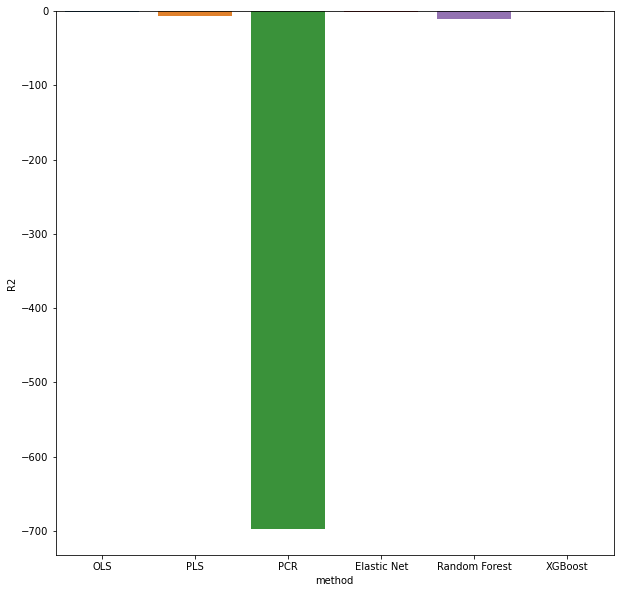

In [262]:
outcome2 = pd.DataFrame(['OLS','PLS','PCR','Elastic Net','Random Forest','XGBoost'],columns = ["method"])
outcome2['R2'] = [R2_OLS,R2_PLS,R2_PCR,R2_EN,R2_RF,R2_xgb]
plt.figure(figsize = [10,10])
sns.barplot(x = 'method', y = 'R2', data = outcome2)